---
# 01.  Data Collection
---

In [143]:
import matplotlib.pyplot as plt 
# import matplotlib.colors as mcolors
import seaborn as sns
sns.set()  # Set style & figures inline

import numpy as np 
import pandas as pd 
import random
import math
import time
import datetime
# import operator 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('fivethirtyeight')
%matplotlib inline

Importing data on global COVID status from https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data . Note that this data is updated daily since 1st of Jan 2020.


In [2]:
# importing confirmed cases
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# importing death cases
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# importing recovered cases
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# # importing updated cases
# latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-19-2020.csv')

In [3]:
confirmed_df['Country/Region'].value_counts() 

China                               33
Canada                              15
United Kingdom                      11
France                              11
Australia                            8
Netherlands                          5
Denmark                              3
Barbados                             1
Egypt                                1
Namibia                              1
Somalia                              1
Mozambique                           1
Nicaragua                            1
North Macedonia                      1
Nigeria                              1
Bulgaria                             1
Burkina Faso                         1
Bahamas                              1
Mali                                 1
Kenya                                1
Lithuania                            1
Libya                                1
West Bank and Gaza                   1
Mongolia                             1
Brazil                               1
Dominican Republic       

In [4]:
deaths_df['Country/Region'].value_counts() 

China                               33
Canada                              15
United Kingdom                      11
France                              11
Australia                            8
Netherlands                          5
Denmark                              3
Barbados                             1
Egypt                                1
Namibia                              1
Somalia                              1
Mozambique                           1
Nicaragua                            1
North Macedonia                      1
Nigeria                              1
Bulgaria                             1
Burkina Faso                         1
Bahamas                              1
Mali                                 1
Kenya                                1
Lithuania                            1
Libya                                1
West Bank and Gaza                   1
Mongolia                             1
Brazil                               1
Dominican Republic       

In [5]:
recovered_df['Country/Region'].value_counts() 

China                               33
France                              11
United Kingdom                      11
Australia                            8
Netherlands                          5
Denmark                              3
Belize                               1
Burkina Faso                         1
Dominican Republic                   1
Egypt                                1
Namibia                              1
Somalia                              1
Mozambique                           1
North Macedonia                      1
Nigeria                              1
Barbados                             1
Bulgaria                             1
Germany                              1
Bahamas                              1
Mali                                 1
Kenya                                1
Lithuania                            1
Botswana                             1
West Bank and Gaza                   1
Djibouti                             1
Mongolia                 

In [6]:
# latest_data

Upon first inspecting the column 'Country/Region', we note that certain countries have been misrepresented; 'US', 'Korea, South', 'Taiwan*', 'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Bahamas, The', 'Gambia, The', and 'Burma'. \
For some reason, they didn't get the memo that Burma was now called Myanmar

### Inspecting the data
---
#### Confirmed cases


In [7]:
# inspecting confirmed cases
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [8]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

It can be observed that some countries have provincial/state data, while most do not. Grouping data from the province/state to allow for a visualisatio of data by countries.

In [9]:
# Group by region (also drop 'Lat', 'Long')
confirmed_country_df = confirmed_df.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,30,39,52,55,60,63,76,91,107,128,128,200,250,297,377,452,568,681,791,1071,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010,6108,6215,6303,6315,6351,6415,6440,6462,6522,6547,6547,6547,6547,6547


In [10]:
confirmed_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, Afghanistan to Zimbabwe
Data columns (total 92 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   1/22/20  185 non-null    int64
 1   1/23/20  185 non-null    int64
 2   1/24/20  185 non-null    int64
 3   1/25/20  185 non-null    int64
 4   1/26/20  185 non-null    int64
 5   1/27/20  185 non-null    int64
 6   1/28/20  185 non-null    int64
 7   1/29/20  185 non-null    int64
 8   1/30/20  185 non-null    int64
 9   1/31/20  185 non-null    int64
 10  2/1/20   185 non-null    int64
 11  2/2/20   185 non-null    int64
 12  2/3/20   185 non-null    int64
 13  2/4/20   185 non-null    int64
 14  2/5/20   185 non-null    int64
 15  2/6/20   185 non-null    int64
 16  2/7/20   185 non-null    int64
 17  2/8/20   185 non-null    int64
 18  2/9/20   185 non-null    int64
 19  2/10/20  185 non-null    int64
 20  2/11/20  185 non-null    int64
 21  2/12/20  185 non-null    int64
 22  2/13/20  185 non

In [11]:
# transposing the dataframe to apply datetime 
confirmed_country = confirmed_country_df.T
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,MS Zaandam,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0


In [12]:
# verify if datetime is now indexed
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [ ]:
# # note that dates dtype is an object (string) and able to set index as DateTimeIndex
# datetime_index = pd.DatetimeIndex(confirmed_country.index)
# confirmed_country.set_index(datetime_index, inplace=True)
# # check out index
# confirmed_country.index

Plotting confirmed cases by country of interest (ASEAN)

In [13]:
# ASEAN countries as countries of interest
coi = ["Brunei", "Burma", "Cambodia", "Indonesia", "Laos", "Malaysia", "Philippines", "Singapore", "Thailand", "Vietnam"]

In [ ]:
# # Plot time series of several countries of interest
# # logy is used to show distinction of when 1st case was reported
# confirmed_country[coi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
# plt.xlabel('Date', fontsize=20);
# plt.ylabel('Reported Confirmed Cases', fontsize=20);
# plt.title('Reported Confirmed Cases Time Series', fontsize=20);

In [14]:
# function for grouping countries
# returns data for countries indexed by date

def group_by_country(raw_data):
    
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [15]:
# function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=True):

    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='upper left')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

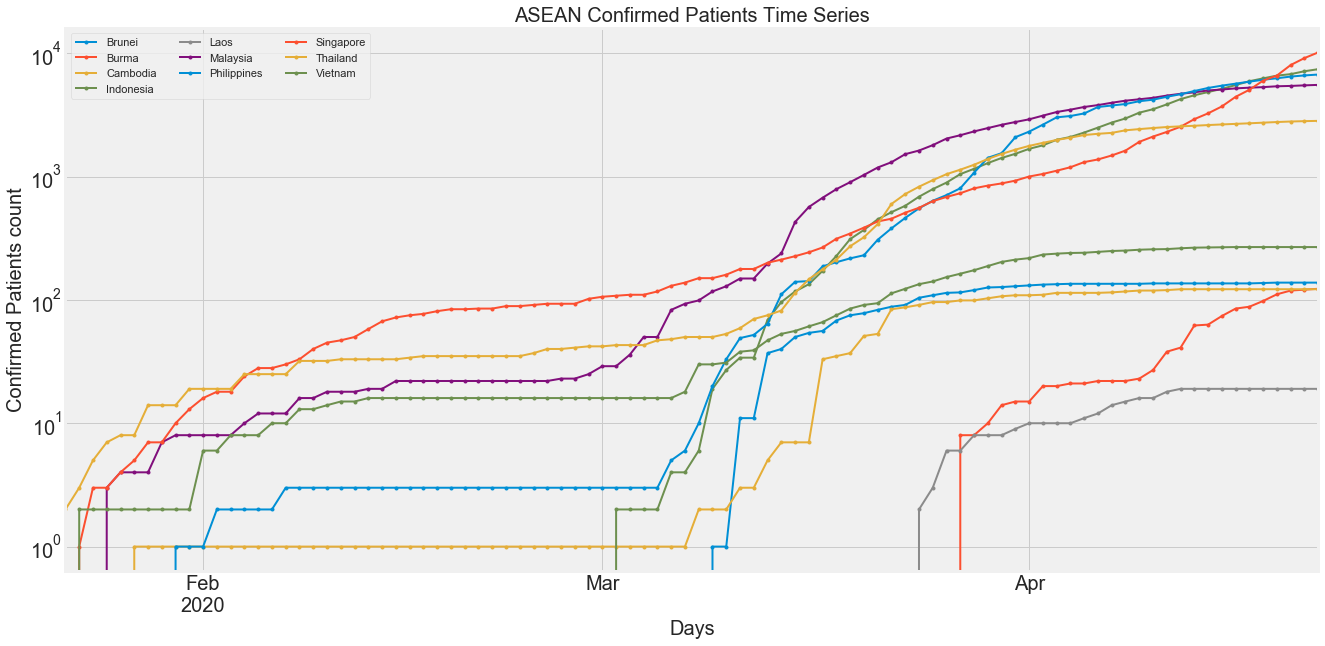

In [16]:
plot_time_series(group_by_country(confirmed_df)[coi], 'ASEAN Confirmed Patients Time Series', 'Days', 'Confirmed Patients count')

The above figure shows progression of the virus for asean countries. Additionally, it shows figures for select countries to only start onwards of March.

#### Death cases


In [17]:
# inspecting death cases
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [18]:
deaths_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

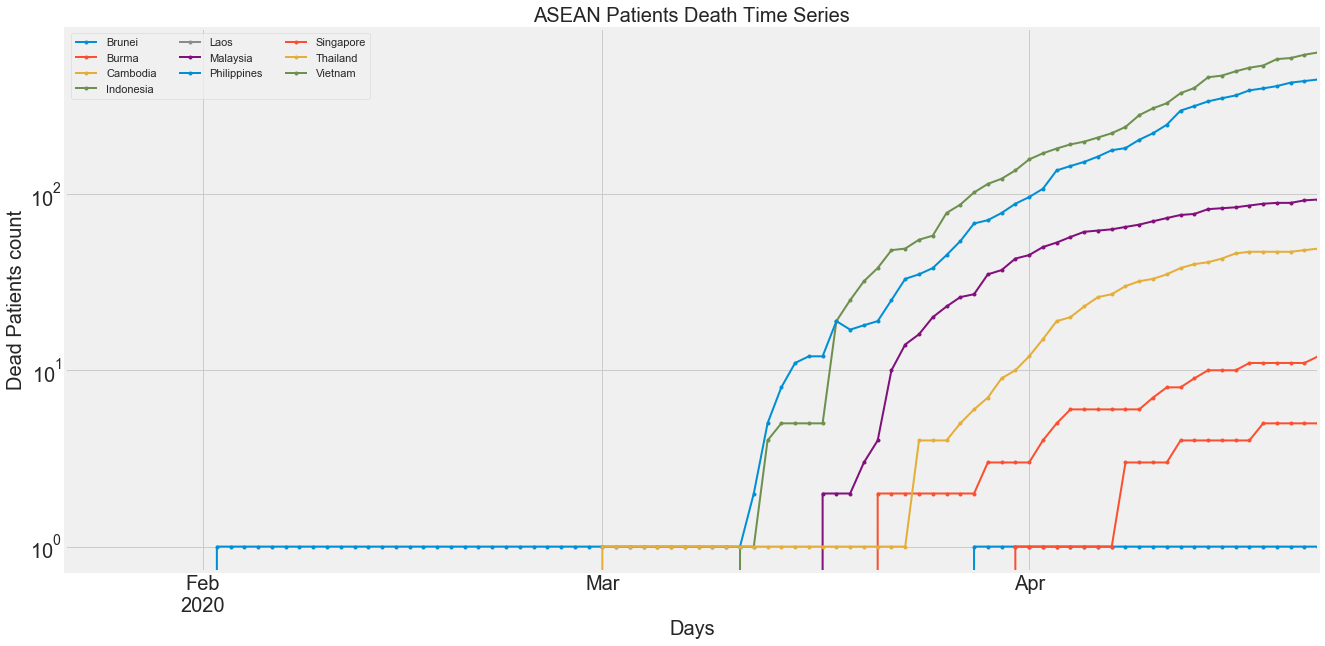

In [19]:
plot_time_series(group_by_country(deaths_df)[coi], 'ASEAN Patients Death Time Series', 'Days', 'Dead Patients count')

#### Recovered cases


In [20]:
# inspecting recovered cases
recovered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  67 non-null     object 
 1   Country/Region  250 non-null    object 
 2   Lat             250 non-null    float64
 3   Long            250 non-null    float64
 4   1/22/20         250 non-null    int64  
 5   1/23/20         250 non-null    int64  
 6   1/24/20         250 non-null    int64  
 7   1/25/20         250 non-null    int64  
 8   1/26/20         250 non-null    int64  
 9   1/27/20         250 non-null    int64  
 10  1/28/20         250 non-null    int64  
 11  1/29/20         250 non-null    int64  
 12  1/30/20         250 non-null    int64  
 13  1/31/20         250 non-null    int64  
 14  2/1/20          250 non-null    int64  
 15  2/2/20          250 non-null    int64  
 16  2/3/20          250 non-null    int64  
 17  2/4/20          250 non-null    int

In [21]:
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

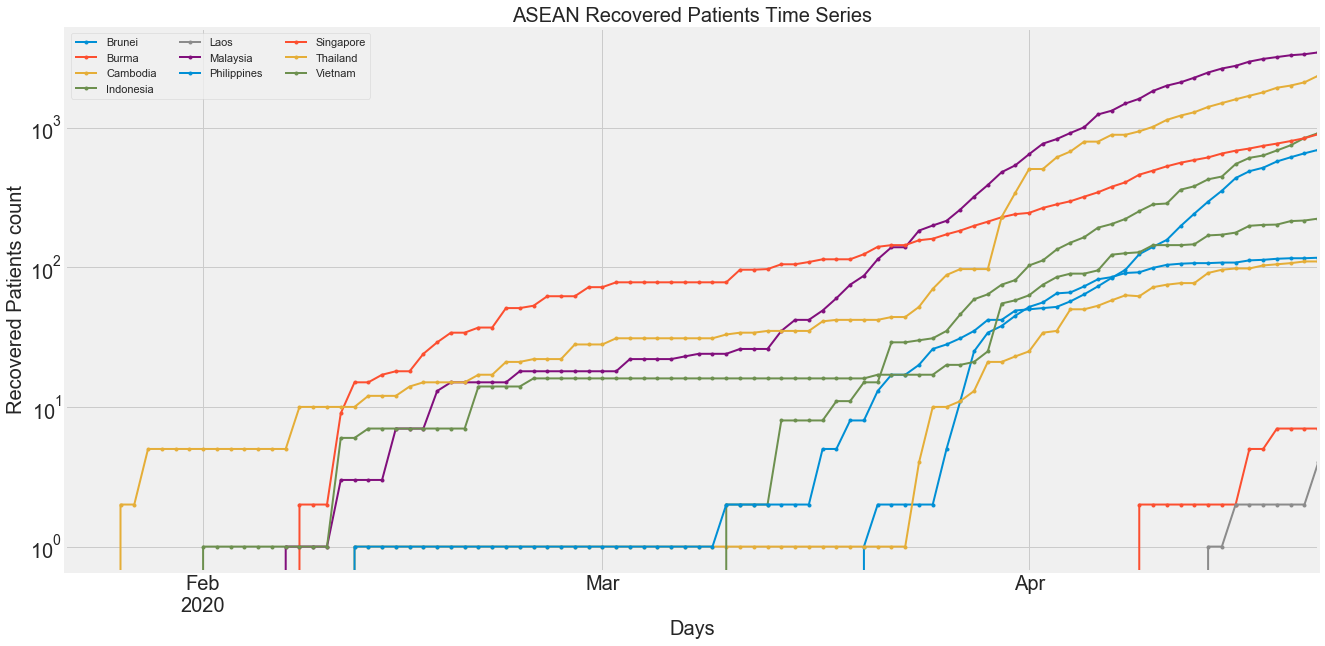

In [22]:
plot_time_series(group_by_country(recovered_df)[coi], 'ASEAN Recovered Patients Time Series', 'Days', 'Recovered Patients count')

---
Collating dates for all areas of interest

In [30]:
cols = confirmed_df.columns
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [31]:
# dataframe for cases, leaving out Province/State, Country/Region, Lat, Long and getting all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recovered = recovered_df.loc[:, cols[4]:cols[-1]]

In [34]:
# for some reason, they didn't get the memo that Burma was now called Myanmar
dates = confirmed.columns

# for global tracking
global_cases = []
global_deaths = [] 
global_mort_rate = []  # mortality rate
global_recovered = [] 
global_rec_rate = []   # recovery rate
global_active = []     # active cases

# creating confirmed case lists for all ASEAN countries
brunei_cases = []
burma_cases = []
cambodia_cases = []
indonesia_cases = []
laos_cases = []
malaysia_cases = []
philippines_cases = []
singapore_cases = []
thailand_cases = []
vietnam_cases = []

# creating death case lists for all ASEAN countries
brunei_deaths = []
burma_deaths = []
cambodia_deaths = []
indonesia_deaths = []
laos_deaths = []
malaysia_deaths = []
philippines_deaths = []
singapore_deaths = []
thailand_deaths = []
vietnam_deaths = []

# creating recovered case lists for all ASEAN countries
brunei_recovered = []
burma_recovered = []
cambodia_recovered = []
indonesia_recovered = []
laos_recovered = []
malaysia_recovered = []
philippines_recovered = []
singapore_recovered = []
thailand_recovered = []
vietnam_recovered = []


for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    
    # confirmed, deaths, recovered, and active cases
    global_cases.append(confirmed_sum)
    global_deaths.append(deaths_sum)
    global_recovered.append(recovered_sum)
    global_active.append(confirmed_sum-deaths_sum-recovered_sum)
    
    # calculate rates
    global_mort_rate.append(deaths_sum/confirmed_sum)
    global_rec_rate.append(recovered_sum/confirmed_sum)

    # ASEAN case studies 
    brunei_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brunei'][i].sum())
    burma_cases.append(confirmed_df[confirmed_df['Country/Region']=='Burma'][i].sum())
    cambodia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Cambodia'][i].sum())
    indonesia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Indonesia'][i].sum())
    laos_cases.append(confirmed_df[confirmed_df['Country/Region']=='Laos'][i].sum())
    malaysia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Malaysia'][i].sum())
    philippines_cases.append(confirmed_df[confirmed_df['Country/Region']=='Philippines'][i].sum())
    singapore_cases.append(confirmed_df[confirmed_df['Country/Region']=='Singapore'][i].sum())
    thailand_cases.append(confirmed_df[confirmed_df['Country/Region']=='Thailand'][i].sum())
    vietnam_cases.append(confirmed_df[confirmed_df['Country/Region']=='Vietnam'][i].sum())


    brunei_deaths.append(deaths_df[deaths_df['Country/Region']=='Brunei'][i].sum())
    burma_deaths.append(deaths_df[deaths_df['Country/Region']=='Burma'][i].sum())
    cambodia_deaths.append(deaths_df[deaths_df['Country/Region']=='Cambodia'][i].sum())
    indonesia_deaths.append(deaths_df[deaths_df['Country/Region']=='Indonesia'][i].sum())
    laos_deaths.append(deaths_df[deaths_df['Country/Region']=='Laos'][i].sum())
    malaysia_deaths.append(deaths_df[deaths_df['Country/Region']=='Malaysia'][i].sum())
    philippines_deaths.append(deaths_df[deaths_df['Country/Region']=='Philippines'][i].sum())
    singapore_deaths.append(deaths_df[deaths_df['Country/Region']=='Singapore'][i].sum())
    thailand_deaths.append(deaths_df[deaths_df['Country/Region']=='Thailand'][i].sum())
    vietnam_deaths.append(deaths_df[deaths_df['Country/Region']=='Vietnam'][i].sum())


    brunei_recovered.append(recovered_df[recovered_df['Country/Region']=='Brunei'][i].sum())
    burma_recovered.append(recovered_df[recovered_df['Country/Region']=='Burma'][i].sum())
    cambodia_recovered.append(recovered_df[recovered_df['Country/Region']=='Cambodia'][i].sum())
    indonesia_recovered.append(recovered_df[recovered_df['Country/Region']=='Indonesia'][i].sum())
    laos_recovered.append(recovered_df[recovered_df['Country/Region']=='Laos'][i].sum())
    malaysia_recovered.append(recovered_df[recovered_df['Country/Region']=='Malaysia'][i].sum())
    philippines_recovered.append(recovered_df[recovered_df['Country/Region']=='Philippines'][i].sum())
    singapore_recovered.append(recovered_df[recovered_df['Country/Region']=='Singapore'][i].sum())
    thailand_recovered.append(recovered_df[recovered_df['Country/Region']=='Thailand'][i].sum())
    vietnam_recovered.append(recovered_df[recovered_df['Country/Region']=='Vietnam'][i].sum())


In [35]:
# getting daily increase

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
global_daily_increase = daily_increase(global_cases)
brunei_daily_increase = daily_increase(brunei_cases)
burma_daily_increase = daily_increase(burma_cases)
cambodia_daily_increase = daily_increase(cambodia_cases)
indonesia_daily_increase = daily_increase(indonesia_cases)
laos_daily_increase = daily_increase(laos_cases)
malaysia_daily_increase = daily_increase(malaysia_cases)
philippines_daily_increase = daily_increase(philippines_cases)
singapore_daily_increase = daily_increase(singapore_cases)
thailand_daily_increase = daily_increase(thailand_cases)
vietnam_daily_increase = daily_increase(vietnam_cases)


# deaths
global_daily_death = daily_increase(global_deaths)
brunei_daily_deaths = daily_increase(brunei_deaths)
burma_daily_deaths = daily_increase(burma_deaths)
cambodia_daily_deaths = daily_increase(cambodia_deaths)
indonesia_daily_deaths = daily_increase(indonesia_deaths)
laos_daily_deaths = daily_increase(laos_deaths)
malaysia_daily_deaths = daily_increase(malaysia_deaths)
philippines_daily_deaths = daily_increase(philippines_deaths)
singapore_daily_deaths = daily_increase(singapore_deaths)
thailand_daily_deaths = daily_increase(thailand_deaths)
vietnam_daily_deaths = daily_increase(vietnam_deaths)


# recoveries
global_daily_recovered = daily_increase(global_recovered)
brunei_daily_recovered = daily_increase(brunei_recovered)
burma_daily_recovered = daily_increase(burma_recovered)
cambodia_daily_recovered = daily_increase(cambodia_recovered)
indonesia_daily_recovered = daily_increase(indonesia_recovered)
laos_daily_recovered = daily_increase(laos_recovered)
malaysia_daily_recovered = daily_increase(malaysia_recovered)
philippines_daily_recovered = daily_increase(philippines_recovered)
singapore_daily_recovered = daily_increase(singapore_recovered)
thailand_daily_recovered = daily_increase(thailand_recovered)
vietnam_daily_recovered = daily_increase(vietnam_recovered)


In [36]:
# incremental dates beginning on 22 Jan, reshapedfor one columns
days_since_22_1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)

# consolidating list of confirmed, death, and recovered cases by dates 
# reshaped for one column of all rows
global_cases = np.array(global_cases).reshape(-1, 1)
global_deaths = np.array(global_deaths).reshape(-1, 1)
global_recovered = np.array(global_recovered).reshape(-1, 1)

In [37]:
# future forecasting for 1 week (7 days)
days_in_future = 7

# from 
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-7]

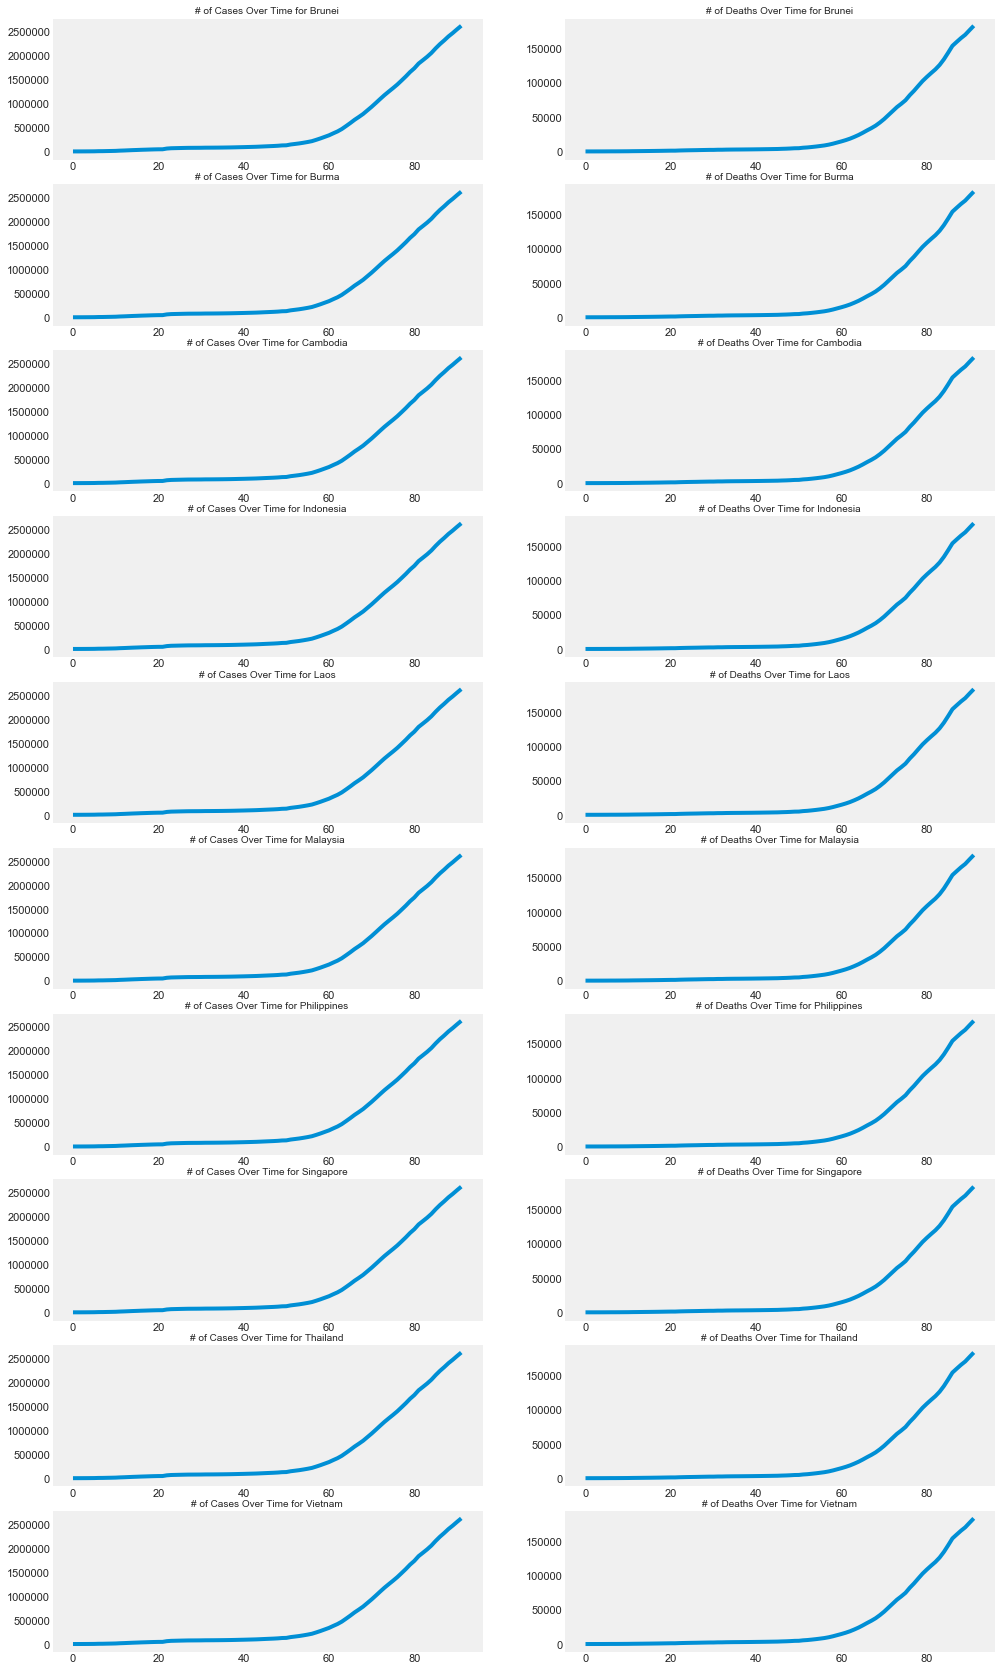

In [83]:


fig, ax = plt.subplots(len(coi),2, figsize=(15,30))

for i, country in enumerate(coi):

    ax[i][0].plot(adjusted_dates, global_cases) 
    ax[i][0].set_title('# of Cases Over Time for '+country, size=10)
    ax[i][0].grid()
#     ax[i][0].set_xlabel('Days Since 22/01/2020')
#     ax[i][0].set_ylabel('# of Cases') 

for i, country in enumerate(coi):
    
    ax[i][1].plot(adjusted_dates, global_deaths) 
    ax[i][1].set_title('# of Deaths Over Time for '+country, size=10)
    ax[i][1].grid()
#     ax[i][0].set_xlabel('Days Since 22/01/2020')
#     ax[i][0].set_ylabel('# of Cases') 


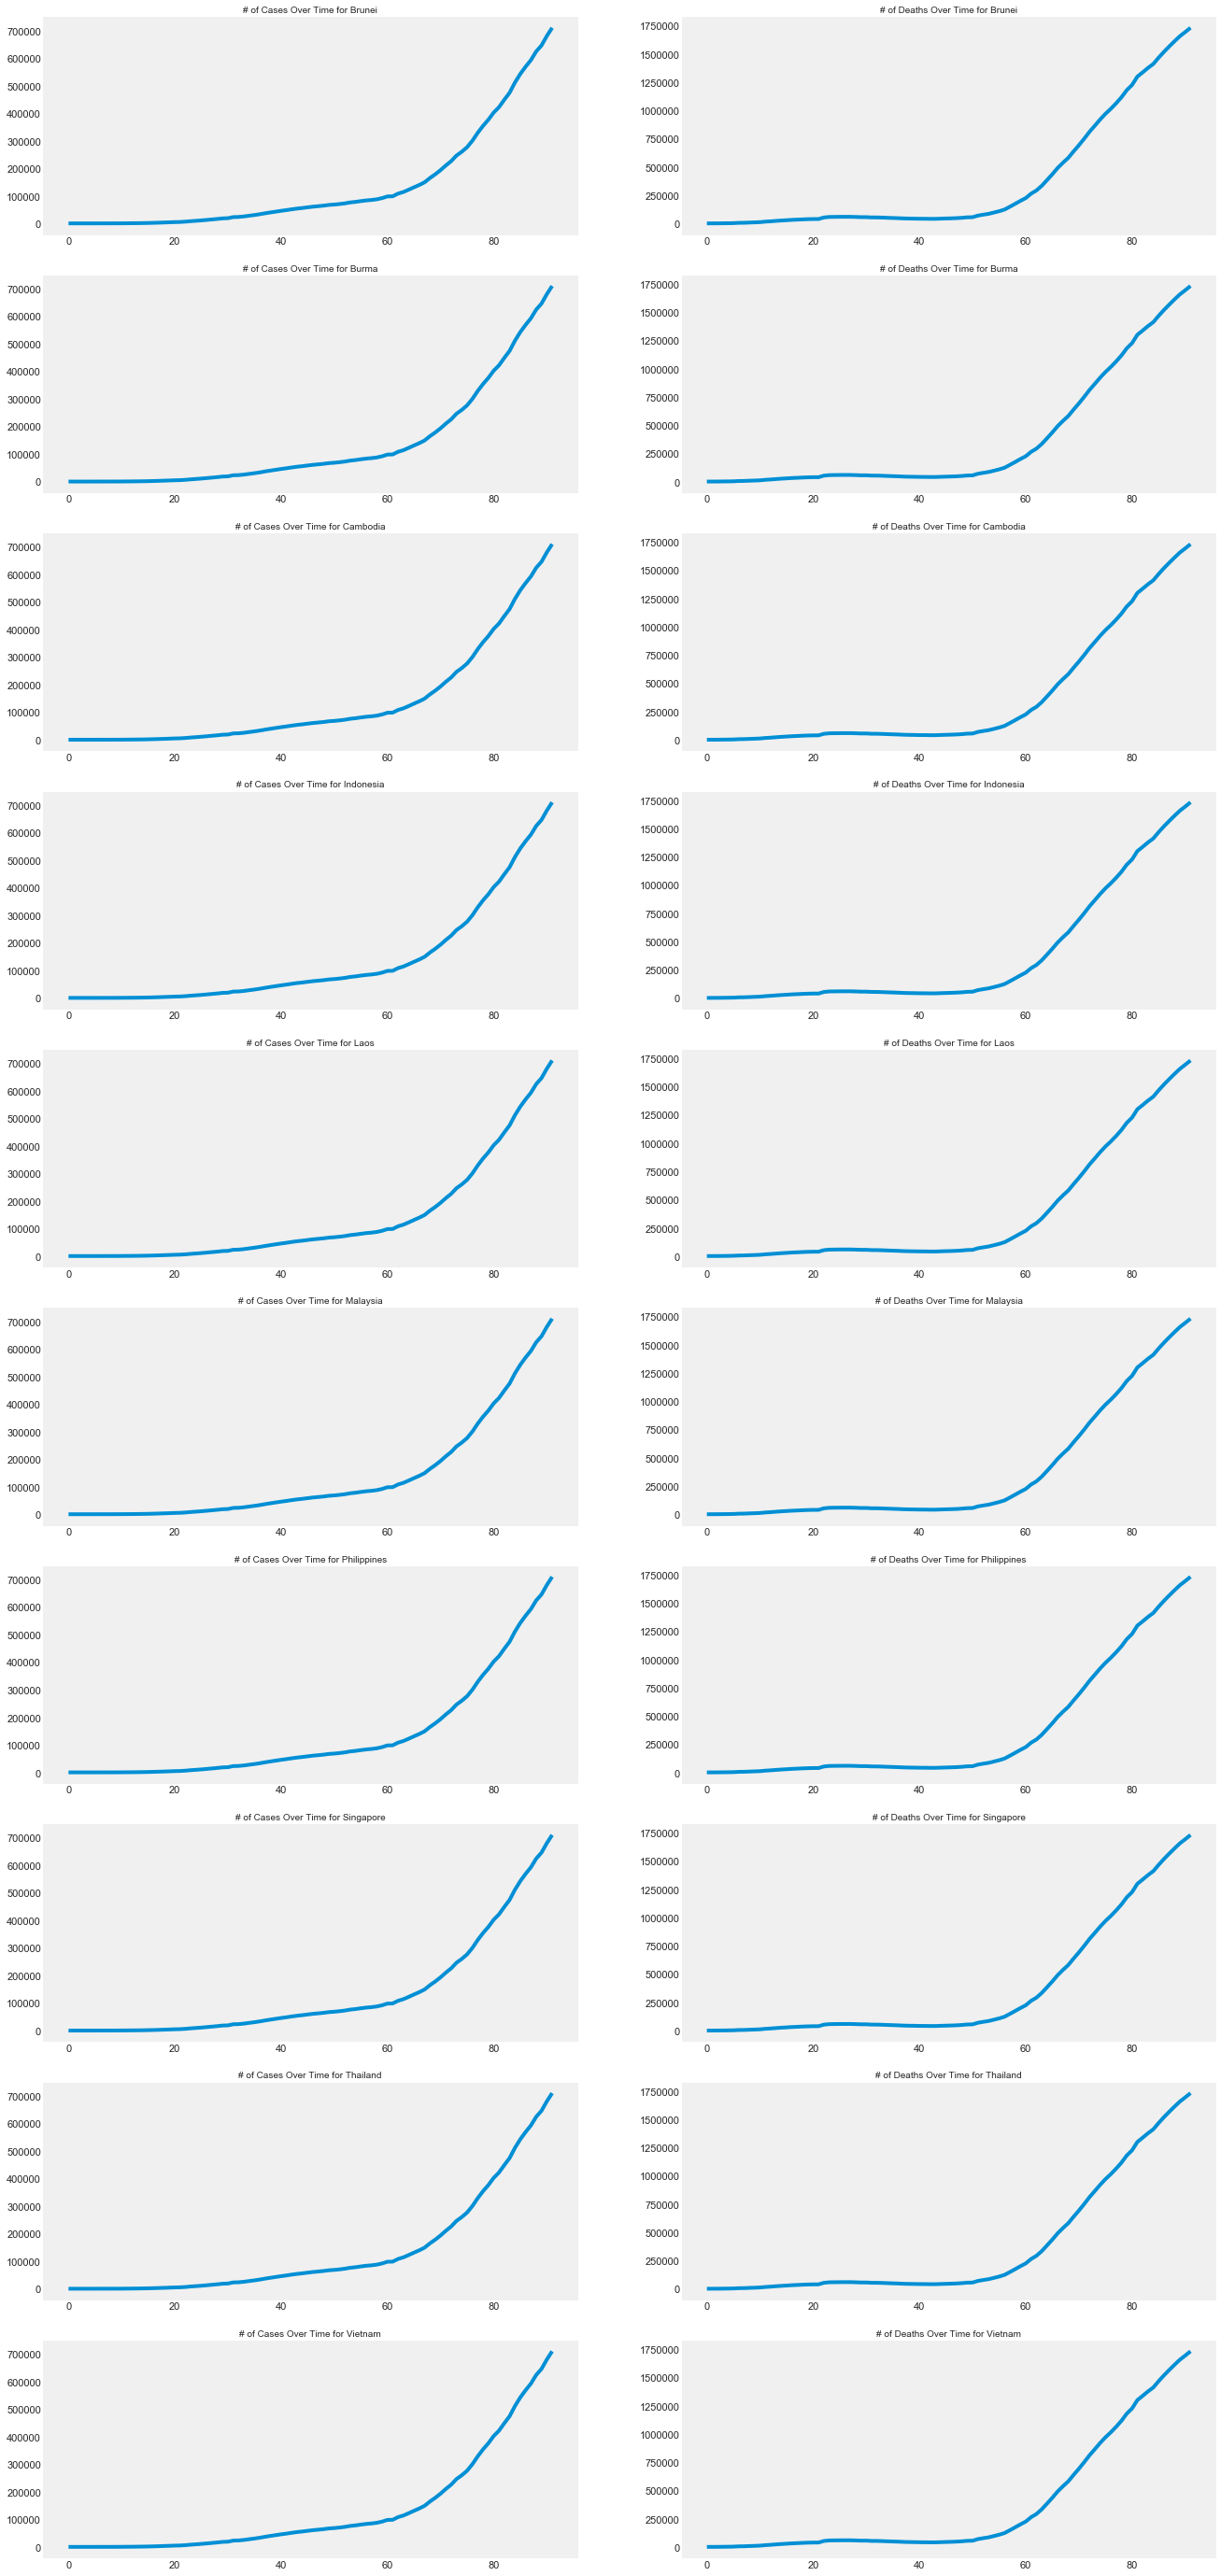

In [85]:
fig, ax = plt.subplots(len(coi),2, figsize=(20,50))

for i, country in enumerate(coi):

    ax[i][0].plot(adjusted_dates, global_recovered) 
    ax[i][0].set_title('# of Cases Over Time for '+country, size=10)
    ax[i][0].grid()
#     ax[i][0].set_xlabel('Days Since 22/01/2020')
#     ax[i][0].set_ylabel('# of Cases') 

for i, country in enumerate(coi):
    
    ax[i][1].plot(adjusted_dates, global_active) 
    ax[i][1].set_title('# of Deaths Over Time for '+country, size=10)
    ax[i][1].grid()
#     ax[i][0].set_xlabel('Days Since 22/01/2020')
#     ax[i][0].set_ylabel('# of Cases') 


# this is where it all went tits up

In [ ]:
# convert integer into datetime for better visualization
start = '22/1/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [ ]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(days_since_22_1, global_cases, test_size=0.2, shuffle=False)

Comparing support vector machine, bayesian ridge , and linear regression models for predictions of confirmed cases.
## imports

In [ ]:
BEWBS

In [ ]:
# use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3, 4, 5, 6, 7]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

In [ ]:
# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)


In [ ]:
svm_search.fit(X_train, y_train)

In [ ]:
svm_search.best_params_

---

In [153]:
X=days_since_22_1
y=global_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)    


In [154]:
# linear regression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train, y_train)
test_linear_pred = linear_model.predict(X_test)
linear_pred = linear_model.predict(future_forecast)
print('MSE:',mean_squared_error(test_linear_pred, y_test))

MSE: 136826128309.9006


In [155]:
print(linear_model.coef_)

[[25258.21495133]]


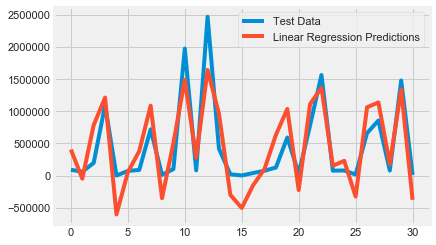

In [156]:
# plotting graphs to check against test data
plt.plot(y_test)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Linear Regression Predictions'])

---
# NEW

In [115]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score

In [128]:
X=days_since_22_1
y=global_active
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)    # DATAFRAME TO DISPLAY RESULTS


In [129]:
# DEFINING A FUNCTION THAT WILL RUN MULTIPLE MODELS AND GRIDSEARCH FOR BEST PARAMETERS

def gridsearch_multi(steps_titles, steps_list, pipe_params):

    #TRAIN-TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)    # DATAFRAME TO DISPLAY RESULTS
    gs_results = pd.DataFrame(columns=['model','AUC Score', 'precision', 'recall', 
                                       'best_params', 'best score', 'confusion matrix', 
                                       'train_accuracy','test_accuracy','baseline_accuracy', 'f1-score'])

    # FOR LOOP THROUGH STEPS LIST
    for i in range(len(steps_list)):
        # INSTATIATE PIPELINE
        pipe = Pipeline(steps=steps_list[i])
        # INSTANTIATE GRIDSEARCHCV WITH PARAMETER ARGUMENT
        gs = GridSearchCV(pipe, pipe_params[i], cv=3) 
        gs.fit(X_train, y_train)
        
        #GETTING PREDICTIONS FROM MODEL
        pred = gs.predict(X_test)
        
        # DEFINE CONFUSION MATRIX ELEMENTS
        tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel() 
        
        #CALCULATING AREA UNDER THE CURVE 
        auc = roc_auc_score(y_test, pred)
        recall=tp/(tp+fp)
        precision=tp/(tn+tp)
        #DEFINE DATAFRAME COLUMNS
        model_results = {}
        model_results['model'] = steps_titles[i]
        model_results['AUC Score'] = auc
        model_results['recall (sensitivity)']= recall
        model_results['best params'] = gs.best_params_
        model_results['best score'] = gs.best_score_
        model_results['confusion matrix']={"TP": tp,"FP":fp, "TN": tn, "FN": fn}
        model_results['train accuracy'] = gs.score(X_train, y_train)
        model_results['test accuracy'] = gs.score(X_test, y_test)
        model_results['baseline accuracy'] = 0.95        
        model_results['precision']= precision
        model_results['f1-score']= 2*(recall*precision)/(recall+precision)


        #APPEND RESULTS TO A NICE DATAFRAME
        df_list.append(model_results) 
        pd.set_option("display.max_colwidth", 200)
    return (pd.DataFrame(df_list)).round(2)

In [140]:
steps_titles = ['RF','GradientTrees','SVM','SS+PCA+SVM']

# CODE FOR PIPELINE TO INSTATIATE MODELS
steps_list = [ 
    [('rf', BaggingClassifier(RandomForestClassifier(random_state=42,max_depth=3),random_state=42,n_estimators=100,n_jobs=-1))],
    [('trees', GradientBoostingClassifier(random_state=42,n_estimators=500,max_depth=3,
                             min_samples_leaf=2))]]
    # need to set balance because we have imblanced classes
#     [('svc', SVC(random_state=42,class_weight='balanced',gamma='auto'))],
#     [('ss',StandardScaler()),('pca',PCA(1)),('svc', SVC(random_state=25,class_weight='balanced',gamma='auto',kernel='rbf'))]
# ]

# LIST OF PARAMETER DICTIONARIES
pipe_params = [
    {'rf__bootstrap_features':[True,False]},
    {'trees__learning_rate':np.linspace(0.1,1,3),'trees__max_features':['sqrt',None]}]
#     {'svc__C':np.linspace(0.01,1,3),'svc__kernel':['linear','rbf']},
#     {'svc__C':np.linspace(0.01,1,3)}]


In [141]:
gridsearch_multi(steps_titles, steps_list, pipe_params)

ValueError: n_splits=3 cannot be greater than the number of members in each class.

---

In [135]:
X.shape

(92, 1)

In [127]:
y

array([[    555,     651,     924, ..., 1656580, 1692937, 1730739],
       [    558,     654,     927, ..., 1656583, 1692940, 1730742],
       [    572,     668,     941, ..., 1656597, 1692954, 1730756],
       ...,
       [ 816233,  816329,  816602, ..., 2472258, 2508615, 2546417],
       [ 856911,  857007,  857280, ..., 2512936, 2549293, 2587095],
       [ 893229,  893325,  893598, ..., 2549254, 2585611, 2623413]],
      dtype=int64)

In [ ]:
# DEFINING A FUNCTION THAT WILL RUN MULTIPLE MODELS AND GRIDSEARCH FOR BEST PARAMETERS

def gridsearch_multi(steps_titles, steps_list, pipe_params):
    
    #DEFINING X and y
    combined.dropna(axis='columns',inplace=True)
    X = combined.drop('WnvPresent',axis=1)
    y = combined['WnvPresent']
    #TRAIN-TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25, stratify=y)
    # DATAFRAME TO DISPLAY RESULTS
    gs_results = pd.DataFrame(columns=['model','AUC Score', 'precision', 'recall', 
                                       'best_params', 'best score', 'confusion matrix', 
                                       'train_accuracy','test_accuracy','baseline_accuracy', 'f1-score'])

    # FOR LOOP THROUGH STEPS LIST
    for i in range(len(steps_list)):
        # INSTATIATE PIPELINE
        pipe = Pipeline(steps=steps_list[i])
        # INSTANTIATE GRIDSEARCHCV WITH PARAMETER ARGUMENT
        gs = GridSearchCV(pipe, pipe_params[i], cv=3) 
        gs.fit(X_train, y_train)
        
        #GETTING PREDICTIONS FROM MODEL
        pred = gs.predict(X_test)
        
        # DEFINE CONFUSION MATRIX ELEMENTS
        tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel() 
        
        #CALCULATING AREA UNDER THE CURVE 
        auc = roc_auc_score(y_test, pred)
        recall=tp/(tp+fp)
        precision=tp/(tn+tp)
        #DEFINE DATAFRAME COLUMNS
        model_results = {}
        model_results['model'] = steps_titles[i]
        model_results['AUC Score'] = auc
        model_results['recall (sensitivity)']= recall
        model_results['best params'] = gs.best_params_
        model_results['best score'] = gs.best_score_
        model_results['confusion matrix']={"TP": tp,"FP":fp, "TN": tn, "FN": fn}
        model_results['train accuracy'] = gs.score(X_train, y_train)
        model_results['test accuracy'] = gs.score(X_test, y_test)
        model_results['baseline accuracy'] = 0.95        
        model_results['precision']= precision
        model_results['f1-score']= 2*(recall*precision)/(recall+precision)


        #APPEND RESULTS TO A NICE DATAFRAME
        df_list.append(model_results) 
        pd.set_option("display.max_colwidth", 200)
    return (pd.DataFrame(df_list)).round(2)

In [ ]:
steps_titles = ['RF','GradientTrees','SVM','SS+PCA+SVM']

# CODE FOR PIPELINE TO INSTATIATE MODELS
steps_list = [ 
    [('rf', BaggingClassifier(RandomForestClassifier(random_state=25,max_depth=3),random_state=25,n_estimators=100,n_jobs=-1))],
    [('trees', GradientBoostingClassifier(random_state=25,n_estimators=500,max_depth=3,
                             min_samples_leaf=2))],
    # need to set balance because we have imblanced classes
    [('svc', SVC(random_state=25,class_weight='balanced',gamma='auto'))],
    [('ss',StandardScaler()),('pca',PCA(1)),('svc', SVC(random_state=25,class_weight='balanced',gamma='auto',kernel='rbf'))]
]

# LIST OF PARAMETER DICTIONARIES
pipe_params = [
    {'rf__bootstrap_features':[True,False]},
    {'trees__learning_rate':np.linspace(0.1,1,3),'trees__max_features':['sqrt',None]},
    {'svc__C':np.linspace(0.01,1,3),'svc__kernel':['linear','rbf']},
    {'svc__C':np.linspace(0.01,1,3)}]


In [ ]:
gridsearch_multi(steps_titles, steps_list, pipe_params)

In [ ]:
brunei
burma
cambodia
indonesia
laos
malaysia
philippines
singapore
thailand
vietnam

"Brunei", "Burma", "Cambodia", "Indonesia", "Laos", "Malaysia", "Philippines", "Singapore", "Thailand", "Vietnam"